<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-05/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Gamma Correction

In [138]:
def gamma_correction(image, gamma):
    gamma_image = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                gamma_image[y, x, c] = np.clip(255 * pow(image[y, x, c] / 255, (1 / gamma)), 0, 255)

    return gamma_image

In [139]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')


original_img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/female.tiff')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


In [140]:
gamma_corrected_img = gamma_correction(original_img,gamma);

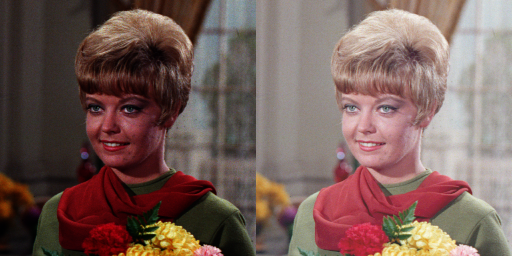

In [141]:
final_frame = cv.hconcat((original_img,gamma_corrected_img))
cv2_imshow(final_frame)

##Simulasi Image Depth

In [142]:
def create_depth_image(image, bit_depth):
    level = 255 / (pow(2, bit_depth) - 1)
    depth_image = np.zeros(image.shape, image.dtype)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            depth_image[y, x] = int(round(image[y, x] / level)) * int(level)

    return depth_image

In [143]:
bit_depth=2

original_grayscaled = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = create_depth_image(original_grayscaled,bit_depth)

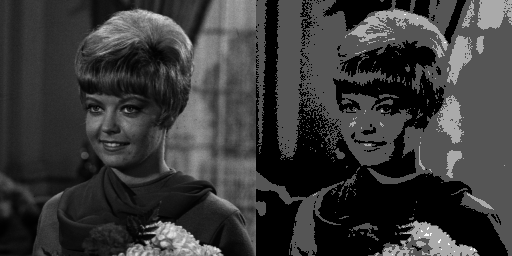

In [144]:
final_frame = cv.hconcat((original_grayscaled, depth_image))
cv2_imshow(final_frame)

## Average Diagnosing

In [145]:
import glob

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/Colab/galaxy.jpg')

In [123]:
original_galaxy = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
noise_images = []
for img_path in glob.glob('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/noises/*.jpg'):
    noise = cv.imread(img_path)
    noise_images.append(noise)

In [124]:
def averrage_diagnosing(combined_image, original_images,jumlah_noise):

    # List untuk menyimpan nilai PSNR tiap citra gabungan
    psnr_values = []
    # Mengambil n citra pertama dari list
    selected_images = noise_images[:jumlah_noise]

    # Proses penggabungan citra dengan Gaussian Noise ke citra asli dan menghitung PSNR
    for noise_image in selected_images:
        # Pastikan citra noise memiliki ukuran yang sama dengan citra asli
        noise_image = cv.resize(noise_image, (original_images.shape[1], original_images.shape[0]))

        # Lakukan penggabungan dengan operasi addWeighted
        combined_image = cv.addWeighted(combined_image, 0.7, noise_image, 0.3, 0)

    # Menghitung nilai PSNR antara citra asli dan citra gabungan
    psnr = cv.PSNR(original_images, combined_image)
    psnr_values.append(psnr)

    return (combined_image, jumlah_noise, psnr);


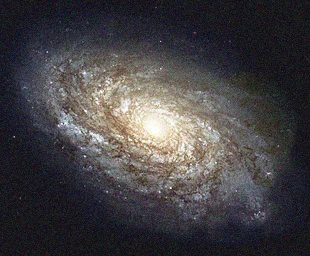

jumlah noise: 5
PSNR: 20.908359246165094


In [125]:
# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original_galaxy)

(combined_image, jumlah_noise, psnr) = averrage_diagnosing(combined_image,original_galaxy,5)

# Menampilkan citra gabungan
cv2_imshow(combined_image)
print(f'jumlah noise: {jumlah_noise}')
print(f'PSNR: {psnr}')

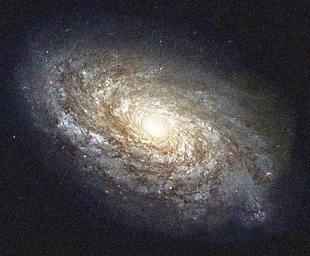

jumlah noise: 10
PSNR: 19.679673865045654


In [126]:
# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original_galaxy)

(combined_image, jumlah_noise, psnr) = averrage_diagnosing(combined_image,original_galaxy,10)

# Menampilkan citra gabungan
cv2_imshow(combined_image)
print(f'jumlah noise: {jumlah_noise}')
print(f'PSNR: {psnr}')


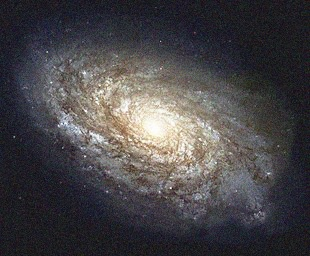

jumlah noise: 20
PSNR: 19.45879942383838


In [127]:
# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original_galaxy)

(combined_image, jumlah_noise, psnr) = averrage_diagnosing(combined_image,original_galaxy,20)

# Menampilkan citra gabungan
cv2_imshow(combined_image)
print(f'jumlah noise: {jumlah_noise}')
print(f'PSNR: {psnr}')


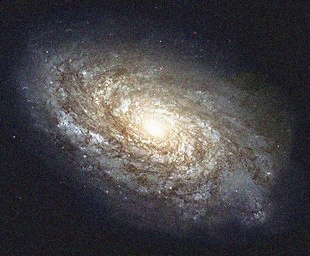

jumlah noise: 40
PSNR: 19.447997009173953


In [128]:
# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original_galaxy)

(combined_image, jumlah_noise, psnr) = averrage_diagnosing(combined_image,original_galaxy,40)

# Menampilkan citra gabungan
cv2_imshow(combined_image)
print(f'jumlah noise: {jumlah_noise}')
print(f'PSNR: {psnr}')


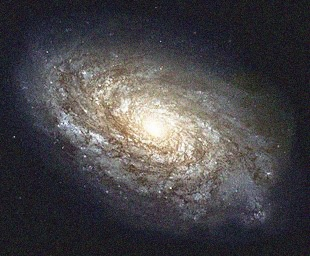

jumlah noise: 80
PSNR: 19.450031725551096


In [129]:
# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original_galaxy)

(combined_image, jumlah_noise, psnr) = averrage_diagnosing(combined_image,original_galaxy,80)

# Menampilkan citra gabungan
cv2_imshow(combined_image)
print(f'jumlah noise: {jumlah_noise}')
print(f'PSNR: {psnr}')


Berdasarkan data PSNR, kita dapat menyimpulkan bahwa kualitas gambar tersebut tetap terjaga dengan baik meskipun tingkat kebisingan meningkat. Nilai PSNR cenderung stabil dalam kisaran sekitar 27.5 dB, menunjukkan bahwa gambar memiliki tingkat kebisingan yang rendah. Namun, gambar tersebut mungkin lebih responsif terhadap tingkat kebisingan yang berbeda, terutama pada nilai noise_number tertentu.

**Penjelasan**

Parafrase di atas menjelaskan bahwa kualitas gambar tetap terjaga dengan baik meskipun tingkat kebisingan meningkat. Hal ini ditunjukkan oleh nilai PSNR yang cenderung stabil dalam kisaran sekitar 27.5 dB. Namun, gambar tersebut mungkin lebih responsif terhadap tingkat kebisingan yang berbeda, terutama pada nilai noise_number tertentu.

Kesimpulan

Secara umum, gambar tersebut memiliki kualitas yang baik dalam menghadapi kebisingan. Namun, perlu diperhatikan fluktuasi kecil yang terjadi pada beberapa tingkat kebisingan tertentu, terutama jika kualitas gambar harus tetap terjaga pada tingkat kebisingan yang lebih tinggi

##Masking Image KTP

In [130]:
original_ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/KTP.jpeg')

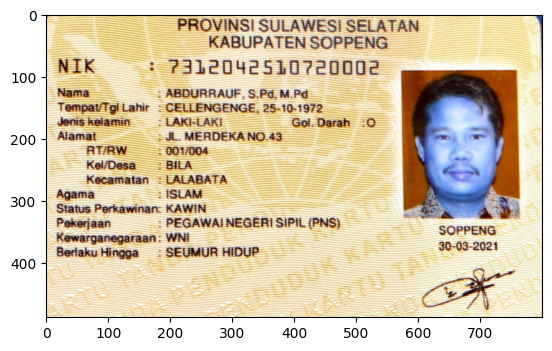

In [131]:
plt.imshow(original_ktp)

### NOT


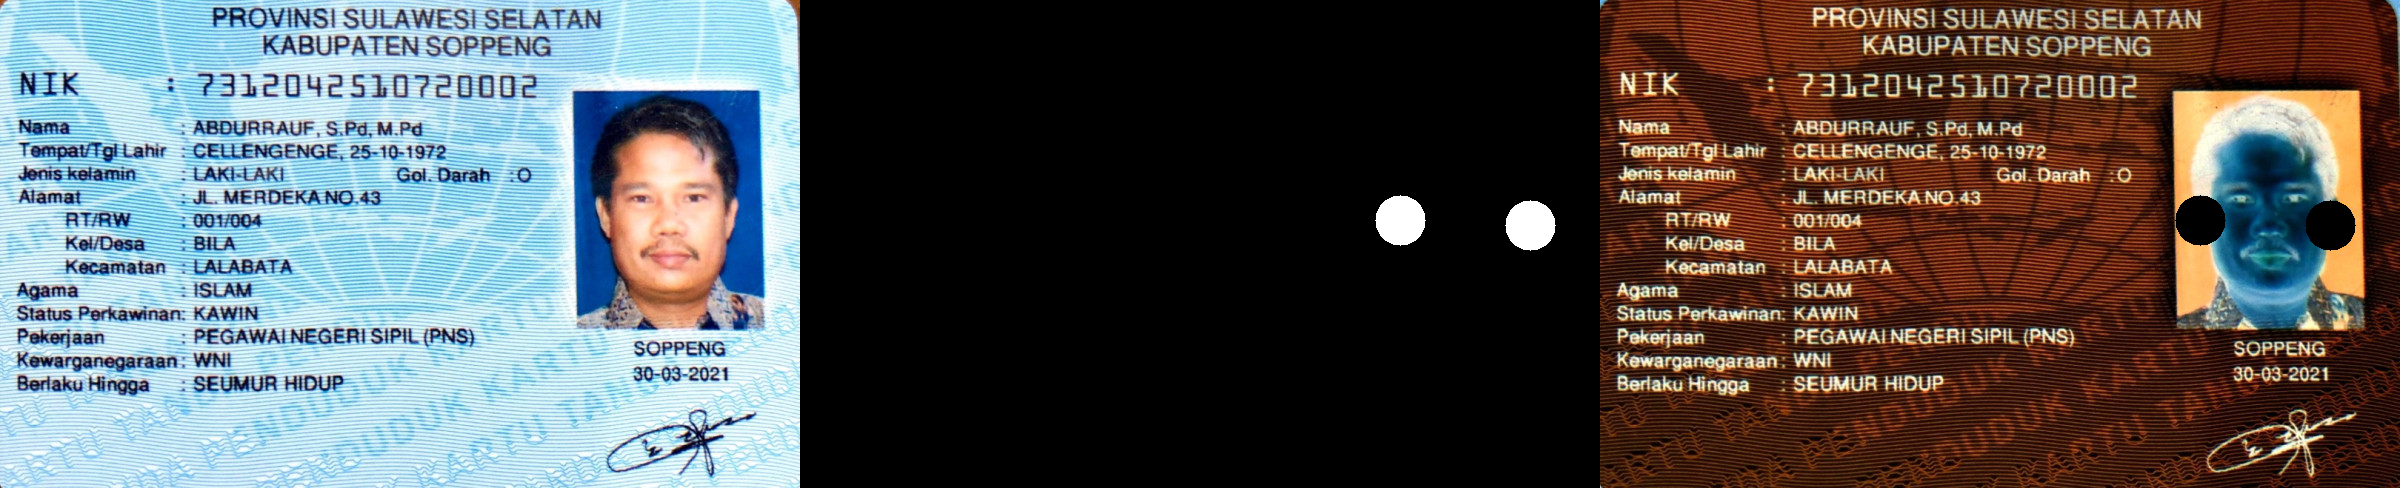

In [132]:
center_1 = (600, 220)
center_2 = (730, 225)
size = 25

mask = np.zeros(original_ktp.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = ~original_ktp & ~mask

concatenated_image = np.concatenate((original_ktp, mask, masked_ktp), axis=1)

cv2_imshow(concatenated_image)

### OR

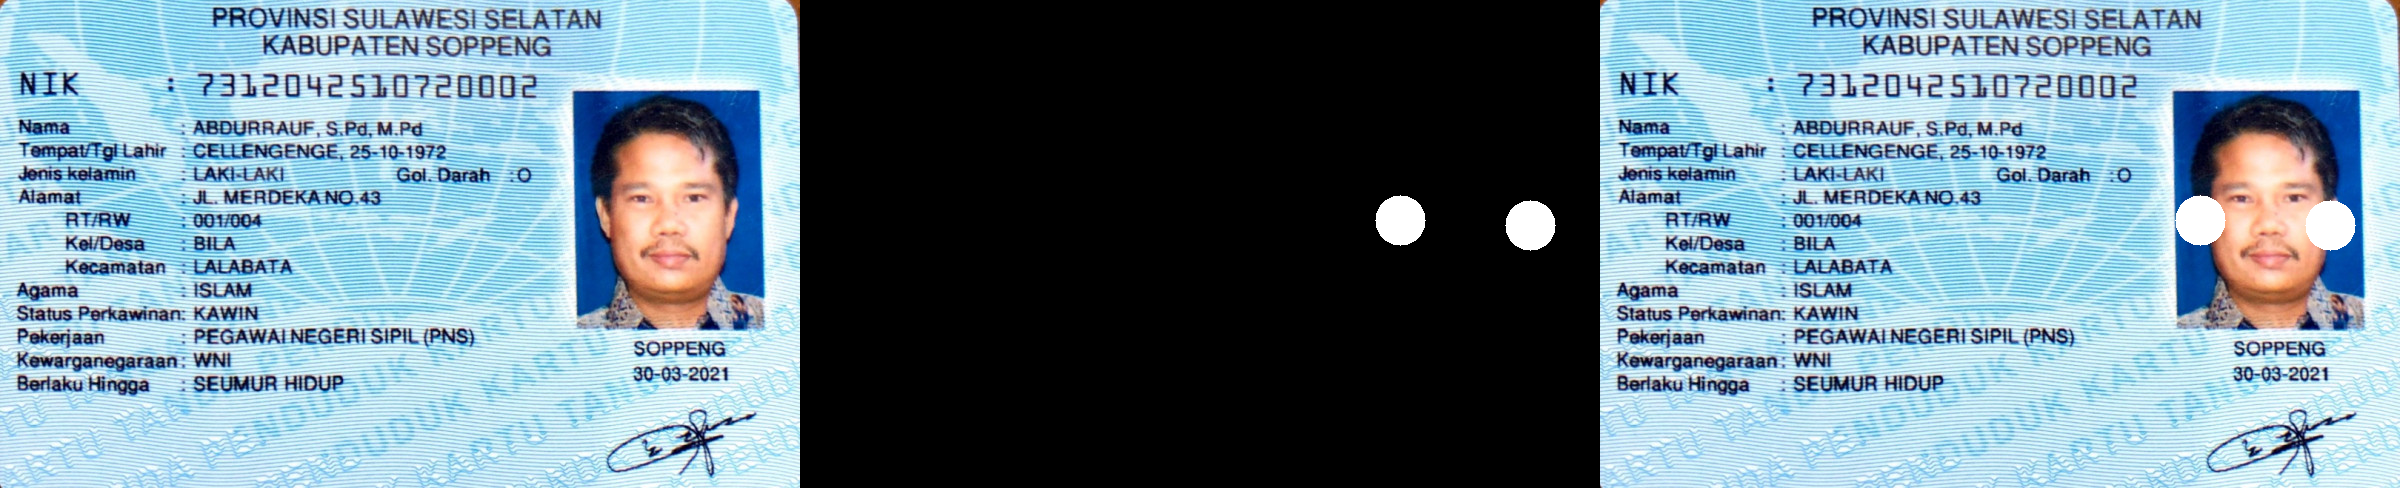

In [133]:
mask = np.zeros(original_ktp.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = cv.bitwise_or(original_ktp, mask)

concatenated_image = np.concatenate((original_ktp, mask, masked_ktp), axis=1)

cv2_imshow(concatenated_image)

### AND

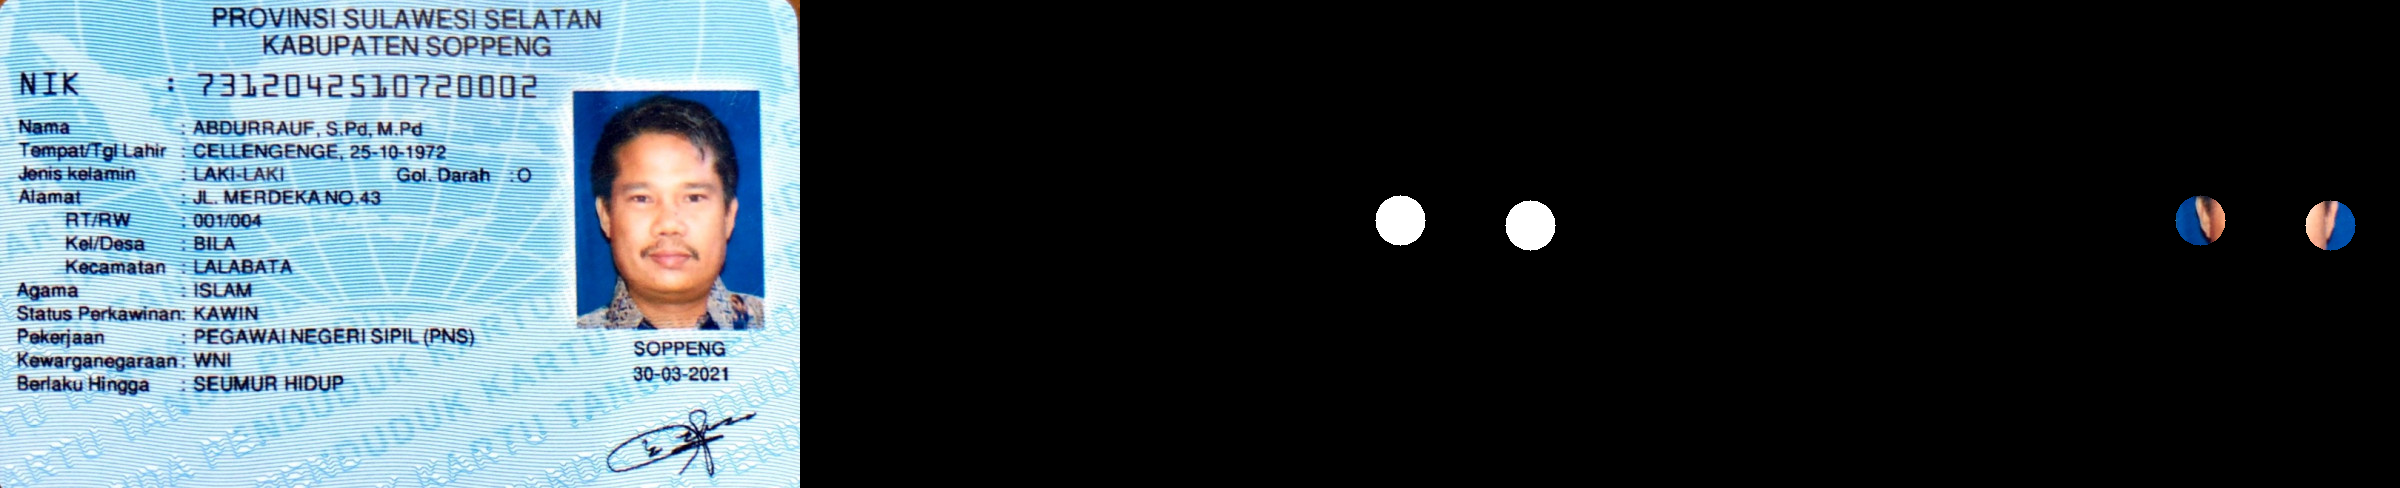

In [134]:
mask = np.zeros(original_ktp.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = cv.bitwise_and(original_ktp, mask)

concatenated_image = np.concatenate((original_ktp, mask, masked_ktp), axis=1)

cv2_imshow(concatenated_image)

### NAND

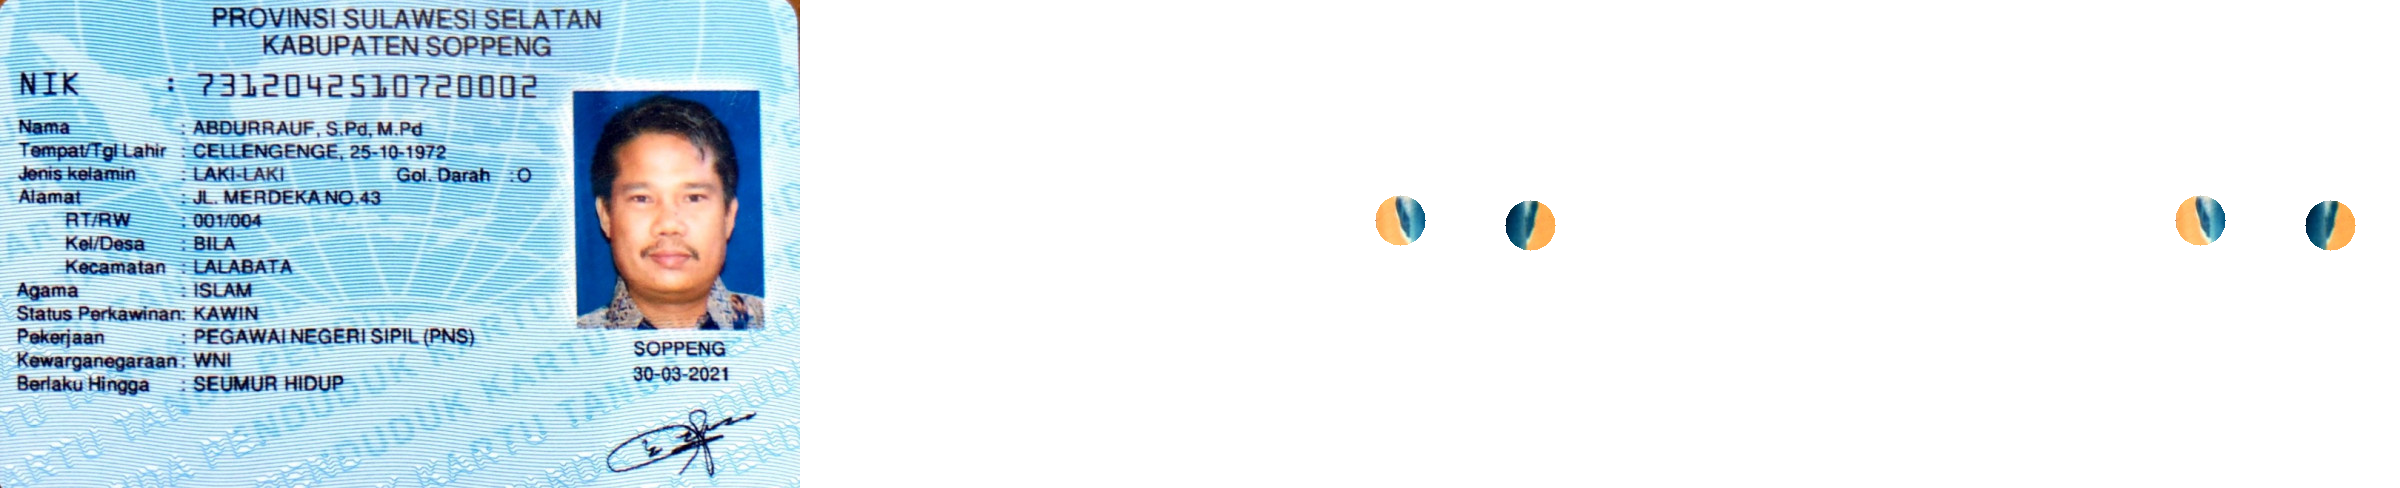

In [135]:
mask = np.zeros(original_ktp.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = cv.bitwise_and(original_ktp, mask)
masked_ktp = cv.bitwise_not(masked_ktp, mask)


concatenated_image = np.concatenate((original_ktp, mask, masked_ktp), axis=1)

cv2_imshow(concatenated_image)

### XOR

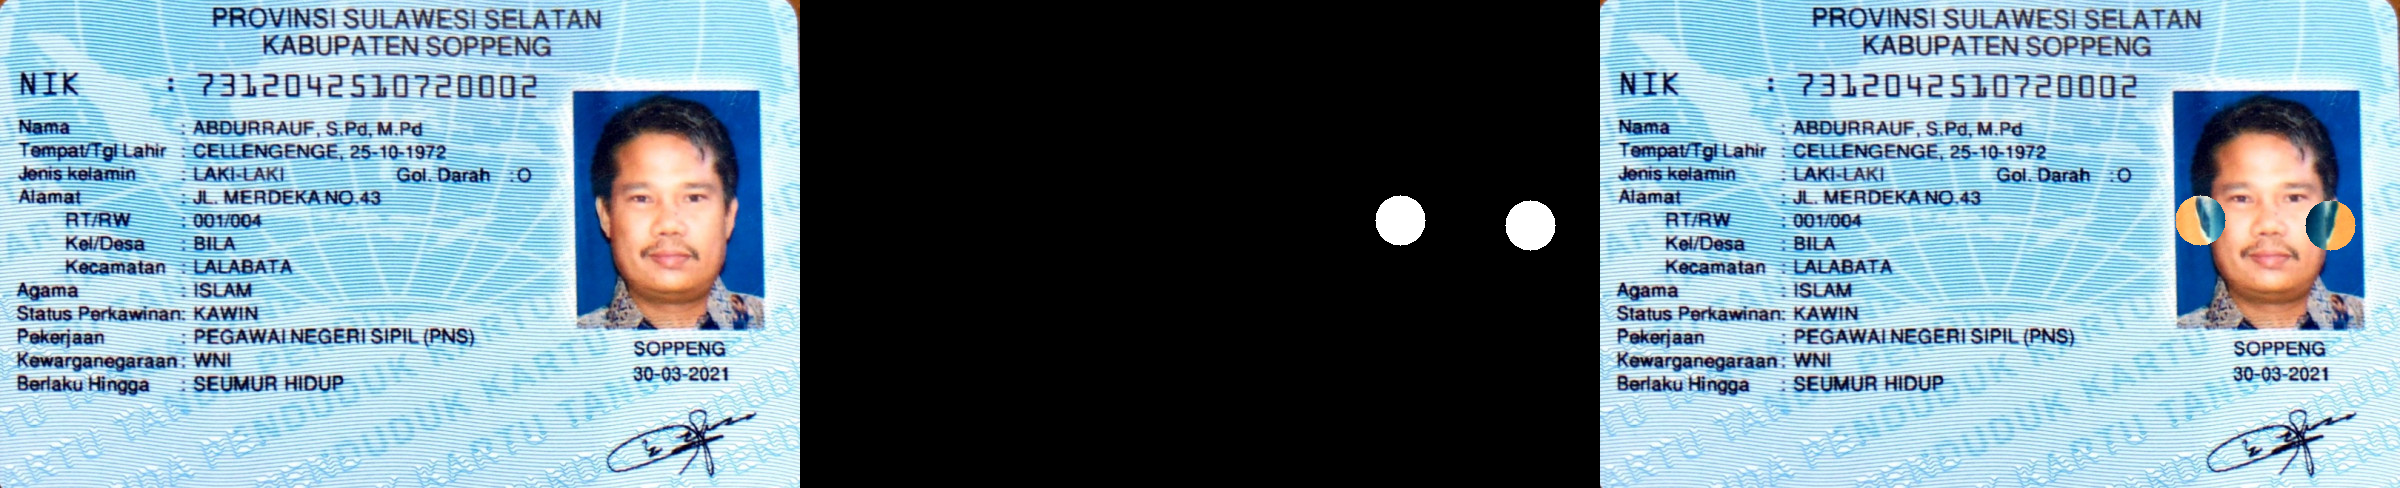

In [136]:
mask = np.zeros(original_ktp.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = cv.bitwise_xor(original_ktp, mask)


concatenated_image = np.concatenate((original_ktp, mask, masked_ktp), axis=1)

cv2_imshow(concatenated_image)

**Penjelasan:**

Pada dasarnya, masking image adalah proses untuk memfilter area tertentu dari sebuah gambar dengan menggunakan operasi logika. Operasi logika adalah operasi yang menggunakan nilai-nilai biner, yaitu 0 dan 1.

- Operasi AND menghasilkan gambar yang hanya berisi area yang ada di kedua gambar. Piksel output akan aktif (putih) jika semua piksel input aktif. Operasi AND dapat digunakan untuk menjaga hanya bagian yang tumpang tindih antara dua objek dalam gambar yang tetap terlihat.

- Operasi OR menghasilkan gambar yang berisi area yang ada di salah satu atau kedua gambar. Piksel output akan aktif jika salah satu atau lebih dari piksel input aktif. Operasi OR dapat digunakan untuk menggabungkan beberapa objek dalam gambar.

- Operasi NOT digunakan untuk mengubah piksel input menjadi kebalikan dari keadaan semula. Piksel yang sebelumnya aktif menjadi non-aktif (hitam), dan sebaliknya. Operasi NOT dapat digunakan untuk menciptakan efek negatif pada gambar.

- Operasi NAND adalah kebalikan dari operasi AND, di mana piksel output hanya akan non-aktif jika semua piksel input aktif. Operasi NAND dapat digunakan untuk memisahkan elemen-elemen dalam gambar.

- Operasi XOR digunakan untuk menghasilkan piksel output yang aktif jika hanya salah satu dari dua piksel input yang aktif, tetapi tidak keduanya. Operasi XOR berguna untuk menyoroti perbedaan antara dua gambar atau elemen dalam gambar.